In [1]:
!pip install torch
!pip install transformers
!pip install logging
!pip install json
!pip install lightgbm
!pip install imblearn

  Using cached torch-2.3.0-cp310-cp310-manylinux1_x86_64.whl.metadata (26 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.wh

Imports:

pandas for data manipulation.
transformers, torch, and related modules for working with transformer models and PyTorch.
numpy, sklearn modules for numerical operations, machine learning preprocessing, modeling, and evaluation.
lightgbm for gradient boosting framework.
imblearn for dealing with imbalanced datasets through over-sampling.
logging and json for logging and JSON operations, respectively.
MLPRegressor for creating a neural network based regression model.
DataFrame Operations:

Reading an Excel file into a DataFrame df.
Dropping a column named 'fit' from df.
Displaying the head of the DataFrame, which shows the first few rows.


In [3]:
import pandas as pd
from transformers import AutoTokenizer, AutoModel
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from transformers import AutoTokenizer, AutoModel, BertTokenizer, BertModel
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
import logging
import json
from sklearn.neural_network import MLPRegressor


df = pd.read_excel("potential-talents.xlsx")
df = df[df.columns.drop('fit')]
df.head()

,id,job_title,location,connection
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+


Ceating a Histogram:
sns.histplot(df['connection_numeric'], bins=30, kde=False, color='skyblue') uses Seaborn's histplot function to create a histogram for the connection_numeric column. The parameters include:
bins=30: Specifies 30 bins for the histogram, controlling the granularity of the distribution visualization.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 6.2 MB/s eta 0:00:00:00:01


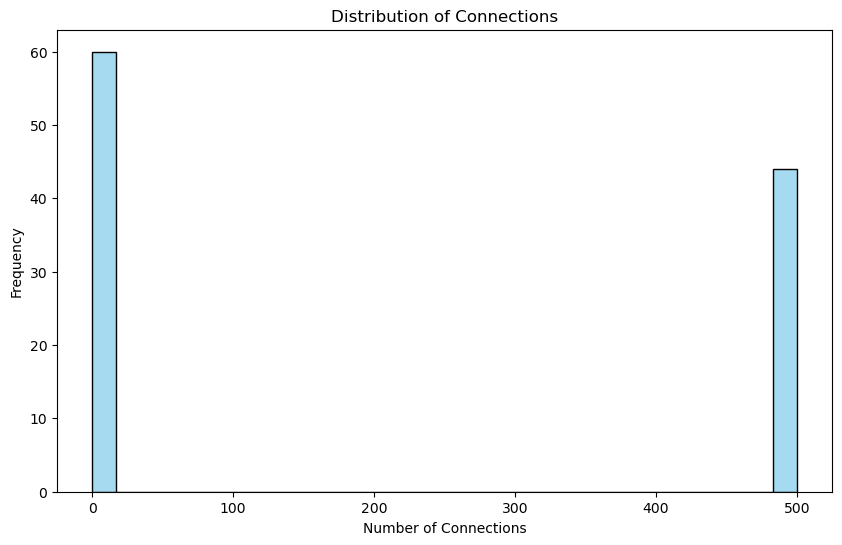

In [12]:
!pip install wordcloud
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

df['connection_numeric'] = df['connection'].str.strip().replace('500+', '500').fillna('0').astype(int)
plt.figure(figsize=(10, 6))
sns.histplot(df['connection_numeric'], bins=30, kde=False, color='skyblue')
plt.title('Distribution of Connections')
plt.xlabel('Number of Connections')
plt.ylabel('Frequency')
plt.show()
plt.close()

Enhance Visualization:
Distrubutions smooth estimate, consider enabling the KDE plot by setting kde=True.

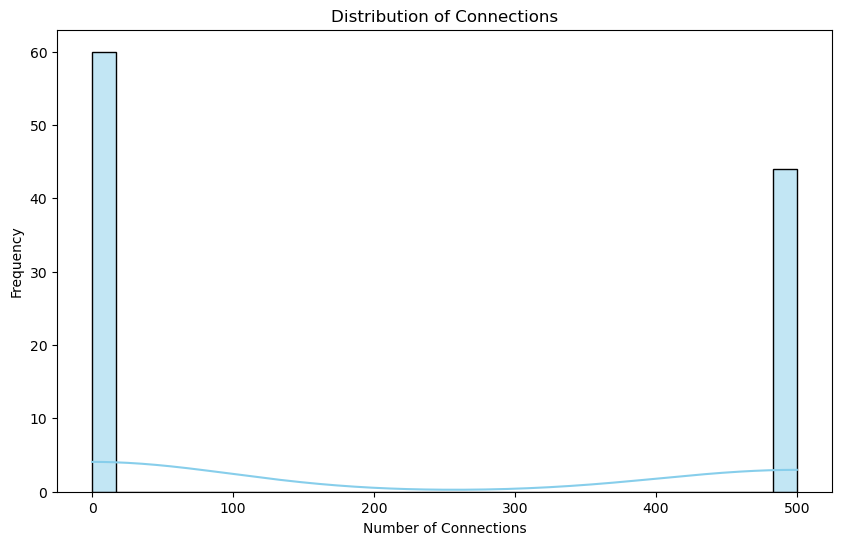

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['connection_numeric'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Connections')
plt.xlabel('Number of Connections')
plt.ylabel('Frequency')
plt.show()  # plt.close() is optional in notebook environments

Creating a Single String from Job Titles:
job_titles_string = ' '.join(df['job_title'].fillna(''))
This line concatenates all job titles into a single string, separating them by spaces. Missing values (NaN) are replaced with an empty string to avoid any errors during concatenation.
Generating the Word Cloud:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(job_titles_string)
A WordCloud object is created with specified dimensions (800x400) and a white background. The generate method creates the word cloud from the job_titles_string.

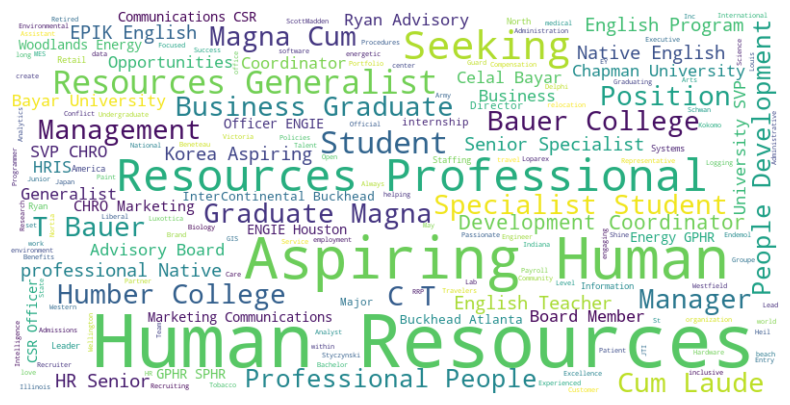

In [13]:
job_titles_string = ' '.join(df['job_title'].fillna(''))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(job_titles_string)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.close()

Enhance Text Preprocessing: Depending on the dataset, further preprocessing of the job titles might improve the word cloud's quality. This could include converting to lowercase, removing punctuation, and excluding common but uninformative words (stopwords).

/tmp/ipykernel_14452/1641571703.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  job_titles_string = ' '.join(df['job_title'].fillna('').str.lower().str.replace('[^\w\s]', ''))


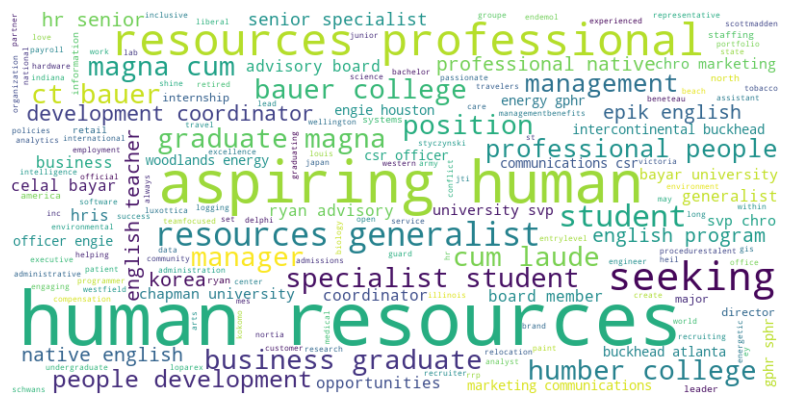

In [14]:
from wordcloud import STOPWORDS

# Basic preprocessing and concatenation of job titles
job_titles_string = ' '.join(df['job_title'].fillna('').str.lower().str.replace('[^\w\s]', ''))

# Generate word cloud with additional parameters
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white',
    max_words=200,
    stopwords=STOPWORDS,
    contour_color='steelblue',
    contour_width=3
).generate(job_titles_string)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show() 

Logging Setup:

The logging module is configured to capture events at the INFO level and higher (INFO, WARNING, ERROR, CRITICAL).
The format specified for the log messages includes the timestamp, the severity level of the event, and the message itself.
Neural Collaborative Filtering (NCF) Model:

The NCF class inherits from nn.Module, which is a base class for all neural network modules in PyTorch.
Constructor (__init__ method): It accepts num_features, the number of input features. The model consists of four fully connected (Linear) layers:
The first layer transforms the input feature vector to a 128-dimensional space.
The second layer reduces the dimension from 128 to 64.
The third layer further reduces it from 64 to 32.
The final layer outputs a single value, likely a prediction score or probability (since it uses a sigmoid activation).
Forward Pass (forward method):
The model processes the input through the layers using ReLU activations for the first three layers to introduce non-linearity.
The output of the final layer is passed through a sigmoid activation function, which squashes the output to a range between 0 and 1. This is typical for binary outcomes or when the output represents a probability.

In [15]:
# Logging setup
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define the NCF model
class NCF(nn.Module):
    def __init__(self, num_features):
        super(NCF, self).__init__()
        self.fc1 = nn.Linear(num_features, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        return x


String Replacement:

df['connection'].str.replace('500+', '500'): This operation targets any entries in the 'connection' column that contain the string '500+'. It replaces this string with '500'. This is commonly done in data cleaning to standardize the data format, particularly when dealing with numerical ranges or categories that are represented inconsistently.
Handling Missing Values:

.fillna('0'): After replacing the string, this function fills any remaining missing or NaN values in the 'connection' column with '0'. This step ensures that there are no null values in the column, which could interfere with subsequent numerical operations or analyses.
Type Conversion:

.astype(int): Finally, the column is converted from its current type (which could be object or string due to the initial string manipulation) to integer (int). This conversion is necessary for mathematical operations and is also beneficial for data storage efficiency and performance during processing.

In [20]:
# Clean the 'connection' column by removing any extra spaces and the '+' sign
df['connection'] = df['connection'].str.replace('500\+', '500').str.strip()

# Convert the cleaned values to integers, handling NaN values with fillna(0)
df['connection'] = df['connection'].fillna('0').astype(int)

#df['connection'] = df['connection'].str.replace('500+', '500').fillna('0').astype(int)

/tmp/ipykernel_14452/2251112551.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['connection'] = df['connection'].str.replace('500\+', '500').str.strip()


In [21]:
'''
df['connection'] = df['connection'].astype(str).str.strip()

# Identify the entries with '500+' 
is_500_plus = df['connection'] == "500+"

# Replace '500+' with random integers between 500 and 1000
df.loc[is_500_plus, 'connection'] = np.random.randint(500, 1000, size=is_500_plus.sum())

# Convert the entire column to integer. All values must be numeric strings or '500+' replaced by integers.
df['connection'] = df['connection'].astype(int)

df.head()
'''

'\ndf[\'connection\'] = df[\'connection\'].astype(str).str.strip()\n\n# Identify the entries with \'500+\' \nis_500_plus = df[\'connection\'] == "500+"\n\n# Replace \'500+\' with random integers between 500 and 1000\ndf.loc[is_500_plus, \'connection\'] = np.random.randint(500, 1000, size=is_500_plus.sum())\n\n# Convert the entire column to integer. All values must be numeric strings or \'500+\' replaced by integers.\ndf[\'connection\'] = df[\'connection\'].astype(int)\n\ndf.head()\n'

Tokenizer Initialization:

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased"): This line initializes a tokenizer for the BERT model. The tokenizer is responsible for converting text into a format that the BERT model can understand, including splitting the text into tokens, converting these tokens into their respective IDs in the BERT vocabulary, and applying any necessary padding or truncation. The "bert-base-uncased" refers to a specific pre-trained model where the tokens are lowercased, and it is a smaller version of BERT models in terms of parameters.
Model Initialization:

model = AutoModel.from_pretrained("bert-base-uncased"): This line loads the pre-trained BERT model corresponding to the tokenizer. The model uses the weights from the BERT base architecture, which has been trained on a large corpus of text in an unsupervised manner. The model can be used for tasks like feature extraction from text, fine-tuning on specific tasks (like sentiment analysis, question answering), or as a component of a larger model for text processing.

In [22]:
# Initialize NLP models for embedding
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")




tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Function Breakdown
Function Definition:

def encode_text(text):
This defines a Python function named encode_text that takes a single argument, text, which is expected to be a string.
Docstring:

""" Function to convert text to embeddings using BERT. """
The docstring provides a brief explanation of what the function does. It states that the function's purpose is to convert text into embeddings, specifically using the BERT model.
Tokenization:

inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
This line uses the BERT tokenizer to convert the input text into a format that can be processed by the BERT model. Here's what each argument means:
return_tensors="pt": This specifies that the output will be PyTorch tensors.
padding=True: Ensures that all sequences are padded to the same length as the longest sequence.
truncation=True: Ensures that if any text is longer than the model's maximum input size, it will be truncated to fit.
Model Processing:

outputs = model(**inputs)
The tokenized input is then passed to the BERT model. The model processes the input and returns an output object containing several tensors.
Extracting Embeddings:

return outputs.pooler_output[0].detach().numpy()
This line extracts the pooled output from the BERT model, which provides a single fixed-size embedding for the entire input sequence. Here’s what each function/method call does:
outputs.pooler_output[0]: The pooled output typically corresponds to an aggregate representation of the input sentence, which is especially useful for classification tasks. The [0] accesses the first item in the batch, assuming the batch size is implicitly one.
detach(): This method is used to detach the output from the current computation graph, meaning that subsequent operations on the tensor won’t require gradients. This is useful when you're only doing inference.
numpy(): Converts the PyTorch tensor into a NumPy array for easier manipulation and integration with non-PyTorch environments.


In [23]:
def encode_text(text):
    """ Function to convert text to embeddings using BERT. """
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs)
    return outputs.pooler_output[0].detach().numpy()

df['job_title'].apply(encode_text): This part of the code applies the encode_text function to each entry in the job_title column of the DataFrame. The apply function in pandas is used to apply a function along the input axis of the DataFrame or Series. In this case, it's applying encode_text to each job title string individually.

df['embeddings'] = ...: This assigns the result of the apply function to a new column in the DataFrame called embeddings. Each entry in this new column will be a NumPy array representing the BERT embeddings of the corresponding job title.

In [24]:
# Precompute embeddings for all candidates

In [25]:
df['embeddings'] = df['job_title'].apply(encode_text)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/ec2-user/anaconda3/env

In [26]:
#Defined Key Words

In [27]:
key_word = "Aspiring human resources"  
target_embedding = encode_text(key_word)

Cosine Similarity Calculation:

df['embeddings'].apply(lambda x: cosine_similarity([x], [target_embedding])[0][0])
This line applies a lambda function to each item in the 'embeddings' column. The lambda function calculates the cosine similarity between the embedding x of each job title and a predefined embedding vector target_embedding.
cosine_similarity([x], [target_embedding]) returns a matrix of similarity scores. Since both x and target_embedding are single embeddings, the result is a 1x1 matrix. [0][0] extracts this single similarity value.
The result of this operation is a new column in df called 'cosine_similarity', where each entry is the cosine similarity score between the job title's embedding and the target_embedding.
Fitness Score Calculation:

df['fitness'] = df['cosine_similarity'] * (df['connection'] / df['connection'].max())
This line calculates a 'fitness' score by multiplying the cosine similarity score by a normalized 'connection' value.
df['connection'] / df['connection'].max() normalizes the 'connection' values in the range 0 to 1 (relative to the maximum 'connection' value in the DataFrame). This normalization step ensures that the contribution of the 'connection' to the 'fitness' score is proportionate and does not dominate due to scale differences.
The resultant 'fitness' score, therefore, is a weighted combination of how similar a job title's context is to the target context (via embeddings) and how strong the connection score is.


In [28]:
#  initial fitness scores
df['cosine_similarity'] = df['embeddings'].apply(lambda x: cosine_similarity([x], [target_embedding])[0][0])
df['fitness'] = df['cosine_similarity'] * (df['connection'] / df['connection'].max())


In [29]:
# Normalizing fitness scores

In [30]:
df['fit'] = (df['fitness'] - df['fitness'].min()) / (df['fitness'].max() - df['fitness'].min())



In [31]:
# Ranking and rearraning data frame

In [33]:
def rank_candidates(data):
    return data.sort_values(by='fit', ascending=False)

Ranking Candidates:

initial_ranked_candidates = rank_candidates(df)
This line suggests there's a function rank_candidates that takes the DataFrame df as input and returns it sorted or transformed in a way that ranks candidates, presumably based on certain criteria such as the previously calculated 'fitness' score or other metrics. The details of how the candidates are ranked depend on the implementation of the rank_candidates function, which isn't provided in your snippet.
Displaying Ranked Candidates:

print(initial_ranked_candidates.head())
After ranking, this line prints the first few rows of the ranked DataFrame initial_ranked_candidates using the head() method, which by default shows the top 5 entries. This is typically used to quickly verify the output of data transformations like sorting or ranking.
Exporting to Excel:

initial_ranked_candidates.to_excel(initial_output_file_path, index=False)
This line exports the initial_ranked_candidates DataFrame to an Excel file named 'initial_ranked_candidates.xlsx'. The index=False parameter indicates that the DataFrame's index (row labels) will not be included in the file, which is often done to keep the file clean of unnecessary data.
The file path is stored in the variable initial_output_file_path, making it easy to change the file path or name in one place without modifying the export line directly.


In [34]:
initial_ranked_candidates = rank_candidates(df)
print(initial_ranked_candidates.head())
initial_output_file_path = 'initial_ranked_candidates.xlsx'
initial_ranked_candidates.to_excel(initial_output_file_path, index=False)

    id                               job_title       location  connection  \
58  59  People Development Coordinator at Ryan  Denton, Texas         500   
46  47  People Development Coordinator at Ryan  Denton, Texas         500   
21  22  People Development Coordinator at Ryan  Denton, Texas         500   
3    4  People Development Coordinator at Ryan  Denton, Texas         500   
33  34  People Development Coordinator at Ryan  Denton, Texas         500   

                                           embeddings  cosine_similarity  \
58  [-0.7887482, -0.19860078, 0.07323178, 0.549266...           0.984712   
46  [-0.7887482, -0.19860078, 0.07323178, 0.549266...           0.984712   
21  [-0.7887482, -0.19860078, 0.07323178, 0.549266...           0.984712   
3   [-0.7887482, -0.19860078, 0.07323178, 0.549266...           0.984712   
33  [-0.7887482, -0.19860078, 0.07323178, 0.549266...           0.984712   

     fitness  fit  
58  0.984712  1.0  
46  0.984712  1.0  
21  0.984712  1.0  


Function Defanation:
Validation Check:

Checks if the starred_id exists in the DataFrame's 'id' column. If it doesn't exist, a ValueError is raised. This ensures that the function operates on valid data.
Marking the Starred Entry:

Sets the 'fit' score of the entry with the starred_id to 1.0, indicating maximum fitness or relevance.
Feature Scaling:

Uses StandardScaler to scale the 'connection' feature. This is important because many machine learning algorithms perform better when input features are on a similar scale.
Training the Neural Network:

Prepares the target variable 'fit', filling missing values with 0.
Initializes and trains an MLPRegressor (a type of neural network) with the scaled features. The network aims to predict the 'fit' score based on the 'connection' feature.
Predicts the 'fit' scores for all entries using the trained model.
Normalizing Fit Scores:

Normalizes the predicted 'fit' scores to a range of 0 to 1. This is useful for comparison and ensures that the scores are proportionately scaled.
Sorting the DataFrame:

Sorts the DataFrame by the new 'fit' scores in descending order and resets the index for clarity.

In [35]:
starred_id = 7 
# Function to update ranking based on feedback
def update_ranking_on_feedback(df, starred_id):
    # Check if starred_id exists in the dataframe
    if starred_id not in df['id'].values:
        raise ValueError("The provided starred_id does not exist in the data.")
    
    # Mark the starred entry with a high fit score
    df.loc[df['id'] == starred_id, 'fit'] = 1.0
    
    # Scale the features
    scaler = StandardScaler()
    X = df[['connection']].apply(pd.to_numeric, errors='coerce').fillna(0)
    X_scaled = scaler.fit_transform(X)
    
    # Define and train the neural network
    y = df['fit'].fillna(0)
    nn = MLPRegressor(hidden_layer_sizes=(10,), max_iter=1000)
    nn.fit(X_scaled, y)
    
    # Predict fit scores for all entries
    df['fit'] = nn.predict(X_scaled)
    
    # Normalize the fit scores between 0 and 1
    df['fit'] = (df['fit'] - df['fit'].min()) / (df['fit'].max() - df['fit'].min())
    
    # Sort the data by fit scores in descending order
    df = df.sort_values(by='fit', ascending=False).reset_index(drop=True)
    
    return df

# Example usage
starred_id = 53  # Assuming we want to update the ranking based on this id
updated_data = update_ranking_on_feedback(df, starred_id)
updated_data.head()


,id,job_title,location,connection,embeddings,cosine_similarity,fitness,fit
0,85,RRP Brand Portfolio Executive at JTI (Japan To...,Greater Philadelphia Area,500,"[-0.91150665, -0.4778901, -0.8753238, 0.819873...",0.852907,0.852907,1.0
1,10,Seeking Human Resources HRIS and Generalist Po...,Greater Philadelphia Area,500,"[-0.80883586, -0.43378523, -0.95322245, 0.7116...",0.798564,0.798564,1.0
2,12,"SVP, CHRO, Marketing & Communications, CSR Off...","Houston, Texas Area",500,"[-0.7769296, -0.5125007, -0.98072743, 0.804932...",0.774014,0.774014,1.0
3,13,Human Resources Coordinator at InterContinenta...,"Atlanta, Georgia",500,"[-0.8616974, -0.30342302, -0.51356554, 0.70777...",0.944082,0.944082,1.0
4,16,Native English Teacher at EPIK (English Progra...,Kanada,500,"[-0.927229, -0.42493495, -0.7332786, 0.8037342...",0.899860,0.899860,1.0


In [36]:
#updated_data is the DataFrame returned by the update_ranking_on_feedback 

In [37]:
feedback_output_file_path = 'ranked_candidates_feedback_MLP_Regression.xlsx'
updated_data.to_excel(feedback_output_file_path, index=False)

Function Description: 
Validation of Input:

Checks if the starred_id is present in the DataFrame. If it's not found, a ValueError is raised, ensuring that the function operates only on valid inputs.
Marking the Starred Entry:

Assigns a high 'fit' score (1.0) to the entry corresponding to the starred_id. This is likely intended to give this entry prominence in the ranking.
Feature Scaling:

Scales the 'connection' feature using StandardScaler. Scaling is crucial for models like LightGBM, even though it's less sensitive to scale variations compared to other algorithms, because it ensures all features contribute equally to model training.
LightGBM Model Training:

Prepares the target variable 'fit' and creates a LightGBM dataset.
Defines the model parameters focusing on regression with gradient boosting.
Trains the model with specified parameters and for a defined number of boosting rounds.
Prediction and Normalization:

Predicts 'fit' scores for all entries using the trained model.
Normalizes these 'fit' scores to a 0-1 range, making the scores easier to interpret and compare.
Sorting the DataFrame:

Sorts the DataFrame by the new 'fit' scores in descending order and resets the index for a clean look.

In [38]:

# Function to update ranking based on feedback
def update_ranking_on_feedback(data, starred_id):
    # Check if starred_id exists in the dataframe
    if starred_id not in data['id'].values:
        raise ValueError("The provided starred_id does not exist in the data.")
    
    # Mark the starred entry with a high fit score
    data.loc[data['id'] == starred_id, 'fit'] = 1.0
    
    # Scale the features
    scaler = StandardScaler()
    X = data[['connection']].apply(pd.to_numeric, errors='coerce').fillna(0)
    X_scaled = scaler.fit_transform(X)
    
    # Define and train the LightGBM model
    y = data['fit'].fillna(0)
    lgb_train = lgb.Dataset(X_scaled, y)
    params = {
        'objective': 'regression',
        'metric': 'rmse',
        'boosting_type': 'gbdt',
        'num_leaves': 31,
        'learning_rate': 0.05,
        'feature_fraction': 0.9
    }
    
    gbm = lgb.train(params, lgb_train, num_boost_round=100)
    
    # Predict fit scores for all entries
    data['fit'] = gbm.predict(X_scaled)
    
    # Normalize the fit scores between 0 and 1
    data['fit'] = (data['fit'] - data['fit'].min()) / (data['fit'].max() - data['fit'].min())
    
    # Sort the data by fit scores in descending order
    data = data.sort_values(by='fit', ascending=False).reset_index(drop=True)
    
    return data

# Example usage
starred_id = 8  # Assuming we want to update the ranking based on this id
updated_data = update_ranking_on_feedback(df, starred_id)
updated_data.head()


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000019 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3
[LightGBM] [Info] Number of data points in the train set: 104, number of used features: 1
[LightGBM] [Info] Start training from score 0.423077
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,id,job_title,location,connection,embeddings,cosine_similarity,fitness,fit
0,85,RRP Brand Portfolio Executive at JTI (Japan To...,Greater Philadelphia Area,500,"[-0.91150665, -0.4778901, -0.8753238, 0.819873...",0.852907,0.852907,1.0
1,10,Seeking Human Resources HRIS and Generalist Po...,Greater Philadelphia Area,500,"[-0.80883586, -0.43378523, -0.95322245, 0.7116...",0.798564,0.798564,1.0
2,12,"SVP, CHRO, Marketing & Communications, CSR Off...","Houston, Texas Area",500,"[-0.7769296, -0.5125007, -0.98072743, 0.804932...",0.774014,0.774014,1.0
3,13,Human Resources Coordinator at InterContinenta...,"Atlanta, Georgia",500,"[-0.8616974, -0.30342302, -0.51356554, 0.70777...",0.944082,0.944082,1.0
4,16,Native English Teacher at EPIK (English Progra...,Kanada,500,"[-0.927229, -0.42493495, -0.7332786, 0.8037342...",0.899860,0.899860,1.0


In [39]:
# Save ranking after feedback to an Excel file
feedback_output_file_path = 'ranked_candidates_feedback_lgb.xlsx'
updated_data.to_excel(feedback_output_file_path, index=False)

Function Desciption :

Validation Check:

The function starts by checking if both 'id' and 'embeddings' columns are present in the DataFrame. If either is missing, it raises a ValueError. This is important to ensure that the necessary data is available for processing.
Stacking Embeddings:

features = np.vstack(data['embeddings'].values)
This line stacks the embeddings stored in the DataFrame into a numpy array for numerical operations. The embeddings should be arrays of floats, and stacking them vertically creates a 2D array where each row corresponds to the embeddings of an entry.
Feature Scaling:

Uses StandardScaler to normalize the features (embeddings). Scaling is crucial before applying principal component analysis (PCA) and clustering because these methods are sensitive to the scale of the data.
Dimensionality Reduction with PCA:

pca = PCA(n_components=2)
Reduces the dimensionality of the features to 2 principal components. This reduction helps to visualize the data in two-dimensional space and also reduces the complexity of the clustering process.
features_pca = pca.fit_transform(features_scaled)
Computes the first two principal components of the scaled features and transforms the data accordingly.
Clustering with KMeans:

kmeans = KMeans(n_clusters=5, random_state=42)
Initializes a KMeans clustering algorithm with 5 clusters and a fixed random state for reproducibility.
clusters = kmeans.fit_predict(features_pca)
Fits the KMeans model to the PCA-reduced features and assigns each entry to one of the five clusters.
Assigning Cluster Labels:

data['cluster'] = clusters
Adds a new column to the DataFrame that contains the cluster labels for each entry.

In [40]:
def reduce_bias_and_automate(data):
    if 'id' not in data.columns or 'embeddings' not in data.columns:
        raise ValueError("Data must contain 'id' and 'embeddings' columns.")
    
    features = np.vstack(data['embeddings'].values)
    
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)
    
    pca = PCA(n_components=2)
    features_pca = pca.fit_transform(features_scaled)
    
    kmeans = KMeans(n_clusters=5, random_state=42)
    clusters = kmeans.fit_predict(features_pca)
    
    data['cluster'] = clusters
    
    return data


Function Use: final_suggestions = reduce_bias_and_automate(updated_data)
This call applies the reduce_bias_and_automate function to the DataFrame updated_data. This function normalizes embeddings, reduces their dimensionality for better handling, and applies a KMeans clustering algorithm to categorize the entries into groups.
The resulting DataFrame, final_suggestions, includes a new column 'cluster' that indicates the cluster each entry belongs to, based on their embeddings.

In [41]:
final_suggestions = reduce_bias_and_automate(updated_data)
print(final_suggestions.head())
suggestions_output_file_path = 'final_suggestions.xlsx'
final_suggestions.to_excel(suggestions_output_file_path, index=False)

   id                                          job_title  \
0  85  RRP Brand Portfolio Executive at JTI (Japan To...   
1  10  Seeking Human Resources HRIS and Generalist Po...   
2  12  SVP, CHRO, Marketing & Communications, CSR Off...   
3  13  Human Resources Coordinator at InterContinenta...   
4  16  Native English Teacher at EPIK (English Progra...   

                    location  connection  \
0  Greater Philadelphia Area         500   
1  Greater Philadelphia Area         500   
2        Houston, Texas Area         500   
3           Atlanta, Georgia         500   
4                     Kanada         500   

                                          embeddings  cosine_similarity  \
0  [-0.91150665, -0.4778901, -0.8753238, 0.819873...           0.852907   
1  [-0.80883586, -0.43378523, -0.95322245, 0.7116...           0.798564   
2  [-0.7769296, -0.5125007, -0.98072743, 0.804932...           0.774014   
3  [-0.8616974, -0.30342302, -0.51356554, 0.70777...           0.944082   

Stacking Embeddings:

features = np.vstack(df['embeddings'].values)
This line takes the 'embeddings' column from the DataFrame df, which contains arrays (presumably of embeddings), and vertically stacks them into a single numpy array. The resulting array, features, will have a shape where each row corresponds to the embeddings of an entry in the DataFrame. This is necessary for most machine learning models which expect input data in a format where each row represents a sample and each column represents a feature.
Extracting Labels:

labels = df['fit'].values
This line extracts the 'fit' values from the DataFrame and stores them in a numpy array labels. These values are used as the target variable for supervised learning models, indicating what the model needs to predict from the embeddings.
Splitting Data into Training and Validation Sets:

X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.2, random_state=42)
This line uses the train_test_split function from the sklearn.model_selection module to split the features and labels arrays into training and validation sets. Here’s what each parameter signifies:
test_size=0.2: 20% of the data will be used as the validation set, while the remaining 80% will be used as the training set.
random_state=42: This parameter seeds the random number generator used for splitting the data, ensuring that the split is reproducible and consistent across different runs.

In [42]:
features = np.vstack(df['embeddings'].values)
labels = df['fit'].values

X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.2, random_state=42)



TensorDataset Creation:

train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
val_dataset = TensorDataset(torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.float32))
These lines create TensorDataset objects for both the training and validation data. A TensorDataset wraps tensors such that each sample will be retrieved by indexing tensors along the first dimension. This is useful for coupling your features (X_train, X_val) with labels (y_train, y_val) in a single dataset object for easier batching and iteration.
The data (X_train, X_val, y_train, y_val) is converted into PyTorch tensors with dtype=torch.float32, ensuring that the data is in the correct format for processing by PyTorch models.
DataLoader Setup:

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)
These lines initialize DataLoader objects for the training and validation datasets. The DataLoader is a versatile tool in PyTorch that provides the ability to batch data, shuffle it, and load it in parallel using multiprocessing workers.
batch_size=32: This sets the number of samples in each batch that the DataLoader will return. This is a typical batch size, but it can be adjusted based on the memory constraints and the specific requirements of the model.
shuffle=True for the training DataLoader ensures that the data is shuffled at every epoch, which helps to reduce model overfitting and improves model generalizability.
shuffle=False for the validation DataLoader because, during validation, there is no need to shuffle data; the goal is to evaluate the model consistently across epochs.


In [43]:
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
val_dataset = TensorDataset(torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.float32))
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)



NCF Model Setup and Training
Model Initialization:

ncf_model = NCF(num_features=features.shape[1]): Initializes the NCF model, which presumably expects the number of features as input to set up its internal architecture.
Loss Function and Optimizer:

criterion = nn.BCELoss(): Sets the binary cross-entropy loss as the criterion for the training. This is typical for binary classification tasks.
optimizer = optim.Adam(ncf_model.parameters(), lr=0.001): Uses the Adam optimizer for updating model weights, with a learning rate of 0.001.
Training Loop:

Runs for a predefined number of epochs (n_epochs = 20). Each epoch consists of:
Training Phase:
Resets gradients (optimizer.zero_grad()).
Computes predictions (outputs = ncf_model(batch_features).squeeze()).
Calculates loss between predictions and actual labels.
Performs backpropagation (loss.backward()) and updates the model parameters (optimizer.step()).
Aggregates the training loss.
Validation Phase:
Evaluates the model without computing gradients (torch.no_grad()).
Computes the validation loss.
Logging:

Logs the training and validation losses after each epoch using Python’s logging library, which is useful for monitoring the model's performance and debugging.


In [44]:
ncf_model = NCF(num_features=features.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(ncf_model.parameters(), lr=0.001)
n_epochs = 20
for epoch in range(n_epochs):
    ncf_model.train()
    train_loss = 0
    for batch_features, batch_labels in train_dataloader:
        optimizer.zero_grad()
        outputs = ncf_model(batch_features).squeeze()
        loss = criterion(outputs, batch_labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    ncf_model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch_features, batch_labels in val_dataloader:
            outputs = ncf_model(batch_features).squeeze()
            loss = criterion(outputs, batch_labels)
            val_loss += loss.item()
    
    logging.info(f'Epoch {epoch+1}/{n_epochs}, Train Loss: {train_loss/len(train_dataloader)}, Val Loss: {val_loss/len(val_dataloader)}')

with torch.no_grad():
    df['ncf_score'] = ncf_model(torch.tensor(features, dtype=torch.float32)).squeeze().numpy()

df['final_rank'] = df['ncf_score'].rank(ascending=False)


2024-05-27 20:33:13,662 - INFO - Epoch 1/20, Train Loss: 0.705991804599762, Val Loss: 0.692790150642395
2024-05-27 20:33:13,679 - INFO - Epoch 2/20, Train Loss: 0.6896780331929525, Val Loss: 0.6837488412857056
2024-05-27 20:33:13,693 - INFO - Epoch 3/20, Train Loss: 0.6850950916608175, Val Loss: 0.6726115942001343
2024-05-27 20:33:13,707 - INFO - Epoch 4/20, Train Loss: 0.6757609844207764, Val Loss: 0.6623423099517822
2024-05-27 20:33:13,720 - INFO - Epoch 5/20, Train Loss: 0.6749140818913778, Val Loss: 0.6528123021125793
2024-05-27 20:33:13,732 - INFO - Epoch 6/20, Train Loss: 0.6829408009847006, Val Loss: 0.6463883519172668
2024-05-27 20:33:13,744 - INFO - Epoch 7/20, Train Loss: 0.6709878245989481, Val Loss: 0.6454035639762878
2024-05-27 20:33:13,757 - INFO - Epoch 8/20, Train Loss: 0.6759591301282247, Val Loss: 0.6434161067008972
2024-05-27 20:33:13,770 - INFO - Epoch 9/20, Train Loss: 0.6827633778254191, Val Loss: 0.6428494453430176
2024-05-27 20:33:13,784 - INFO - Epoch 10/20, Tr

In [45]:
# Save the final ranking using NCF to an Excel file
final_ncf_ranking_output_file_path = 'final_ncf_ranking.xlsx'
df.to_excel(final_ncf_ranking_output_file_path, index=False)

Neural Network Model Definition (EnhancedNCF):

Class Design: The EnhancedNCF class inherits from nn.Module and is designed to handle any input dimensionality, making it flexible for various datasets.
Architecture: It consists of two fully connected hidden layers and a final output layer that passes through a sigmoid activation function. This setup is typical for binary classification tasks, where the model predicts probabilities.
Forward Pass: Implements the forward propagation logic, applying ReLU activations to hidden layers and a sigmoid to the output layer, providing the likelihood of each input belonging to a particular class.
Data Processing Functions:

process_embeddings Function: Converts a string representation of embeddings (presumably saved in the Excel files as text) into a PyTorch tensor. This involves stripping unwanted characters, splitting the string into a list of floats, and transforming this list into a tensor.
process_file Function: Handles the bulk of file processing:
Data Loading: Uses pandas to read data from an Excel file.
Feature Extraction and Handling: Checks for and processes necessary columns ('embeddings', 'cosine_similarity', and 'connection'). If any expected columns are missing, it creates placeholder columns filled with zeros to ensure consistent data handling.
Feature Combination: Combines all individual feature tensors into a single tensor, which serves as input to the neural network.
Model Training and Validation Setup:

Dummy Labels Creation: Since the script currently lacks actual labels, it initializes a dummy label tensor filled with zeros. This is a placeholder and should ideally be replaced with actual target data for meaningful model training.
DataLoader Configuration: Constructs DataLoader instances for both training and validation datasets to manage data batching and shuffling.
Training Loop: Executes the training over a specified number of epochs, using Adam as the optimizer and binary cross-entropy as the loss function. Each epoch involves training the model on the batched data and calculating loss for both training and validation datasets.
Logging and Output:

Logging: Uses Python's logging library to record the training and validation losses after each epoch, aiding in monitoring the model's performance.
Predictive Scoring and Output: After training, the model predicts scores for all data points, which are appended to the original DataFrame. The enhanced DataFrame is then saved back to an Excel file, replacing the original with a version that includes the predictive scores.
Batch Processing of Files:

Iterates through a predefined list of Excel file paths, applying the process_file function to each. This allows for batch processing of multiple datasets in a standardized manner.


In [47]:
import torch
import torch.nn as nn
import torch.optim as optim
import logging
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np

class EnhancedNCF(nn.Module):
    def __init__(self, input_dim):
        super(EnhancedNCF, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.output = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.sigmoid(self.output(x))
        return x

def process_embeddings(embedding_str):
    # Remove square brackets and convert the space-separated string of numbers into a list of floats
    cleaned_str = embedding_str.replace('[', '').replace(']', '')
    embedding_list = list(map(float, cleaned_str.split()))
    return torch.tensor(embedding_list, dtype=torch.float32)

def process_file(file_path):
    # Load the data
    df = pd.read_excel(file_path)
    
    # Check for required columns and process accordingly
    features_list = []
    
    if 'embeddings' in df.columns:
        embeddings = df['embeddings'].apply(process_embeddings).tolist()
        embeddings = torch.stack(embeddings)
        features_list.append(embeddings)
    
    if 'cosine_similarity' in df.columns:
        cosine_similarity = torch.tensor(df['cosine_similarity'].values, dtype=torch.float32).unsqueeze(1)
        features_list.append(cosine_similarity)
    else:
        # Add a zero column if cosine_similarity is missing
        cosine_similarity = torch.zeros((len(df), 1), dtype=torch.float32)
        features_list.append(cosine_similarity)
    
    if 'connection' in df.columns:
        # Convert connection column to numeric values, filling non-numeric values with 0
        df['connection'] = pd.to_numeric(df['connection'], errors='coerce').fillna(0)
        connection = torch.tensor(df['connection'].values, dtype=torch.float32).unsqueeze(1)
        features_list.append(connection)
    else:
        # Add a zero column if connection is missing
        connection = torch.zeros((len(df), 1), dtype=torch.float32)
        features_list.append(connection)
    
    # Combine features
    features = torch.cat(features_list, dim=1)
    
    # Create dummy labels within the correct range (0, 1)
    labels = torch.zeros(len(df), dtype=torch.float32)
    
    input_dim = features.shape[1]
    ncf_model = EnhancedNCF(input_dim)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(ncf_model.parameters(), lr=0.001)
    
    # Create DataLoader for training and validation
    dataset = TensorDataset(features, labels)
    train_dataloader = DataLoader(dataset, batch_size=32, shuffle=True)
    val_dataloader = DataLoader(dataset, batch_size=32, shuffle=False)
    
    # Training loop
    n_epochs = 20
    for epoch in range(n_epochs):
        ncf_model.train()
        train_loss = 0
        for batch_features, batch_labels in train_dataloader:
            optimizer.zero_grad()
            outputs = ncf_model(batch_features).squeeze()
            loss = criterion(outputs, batch_labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        
        ncf_model.eval()
        val_loss = 0
        with torch.no_grad():
            for batch_features, batch_labels in val_dataloader:
                outputs = ncf_model(batch_features).squeeze()
                loss = criterion(outputs, batch_labels)
                val_loss += loss.item()
        
        logging.info(f'Epoch {epoch+1}/{n_epochs}, Train Loss: {train_loss/len(train_dataloader)}, Val Loss: {val_loss/len(val_dataloader)}')
    
    # Calculate NCF scores for the entire dataset
    with torch.no_grad():
        df['ncf_score'] = ncf_model(features).squeeze().numpy()
    
    # Save the output with all original columns plus the NCF scores
    output_file = file_path.replace('.xlsx', '_output.xlsx')
    df.to_excel(output_file, index=False)
    
    return df

# List of files to process
files = [
    'final_suggestions.xlsx',
    'final_ncf_ranking.xlsx',
    'initial_ranked_candidates.xlsx',
    'potential-talents.xlsx',
    'ranked_candidates_feedback_lgb.xlsx',
    'ranked_candidates_feedback_MLP_Regression.xlsx'
]

# Process each file and save the outputs
for file in files:
    process_file(file)



2024-05-27 20:35:01,619 - INFO - Epoch 1/20, Train Loss: 0.35542866215109825, Val Loss: 0.07919049395422917
2024-05-27 20:35:01,649 - INFO - Epoch 2/20, Train Loss: 0.038824842777103186, Val Loss: 0.007488734964908872
2024-05-27 20:35:01,672 - INFO - Epoch 3/20, Train Loss: 0.0033502424630569294, Val Loss: 0.0009304973955224227
2024-05-27 20:35:01,700 - INFO - Epoch 4/20, Train Loss: 0.0005443137501970341, Val Loss: 0.00019174359952034425
2024-05-27 20:35:01,738 - INFO - Epoch 5/20, Train Loss: 0.00014087040017329855, Val Loss: 6.21354686521497e-05
2024-05-27 20:35:01,794 - INFO - Epoch 6/20, Train Loss: 6.194742331899761e-05, Val Loss: 2.8032834051713862e-05
2024-05-27 20:35:01,824 - INFO - Epoch 7/20, Train Loss: 2.568861089002894e-05, Val Loss: 1.598845579035401e-05
2024-05-27 20:35:01,852 - INFO - Epoch 8/20, Train Loss: 1.542885553362794e-05, Val Loss: 1.0782142981496413e-05
2024-05-27 20:35:01,890 - INFO - Epoch 9/20, Train Loss: 9.346187567871311e-06, Val Loss: 8.190123228224e-0